In [1]:
import os
path_pipest = os.path.abspath('./')
n=0
while (not os.path.basename(path_pipest)=='pipest') and (n<6):
    path_pipest=os.path.dirname(path_pipest)
    n+=1 
if not os.path.basename(path_pipest)=='pipest':
    raise ValueError("path_pipest not found. Instead: {}".format(path_pipest))
path_sdhawkes=path_pipest+'/sdhawkes'
path_lobster=path_pipest+'/lobster'
path_lobster_data=path_lobster+'/data'
path_lobster_pyscripts=path_lobster+'/py_scripts'
path_models=path_pipest+'/models'
path_tests=path_pipest+'/tests'
path_saved_tests=path_tests+'/saved_tests'
path_impact_models = path_pipest+'/impact/models'

In [2]:
import time
import sys
sys.path.append(path_sdhawkes+'/resources/')
sys.path.append(path_sdhawkes+'/modelling/')
sys.path.append(path_lobster_pyscripts+'/')

In [3]:
print(sys.path)

['/home/claudio/pipest/pipest/models', '/home/claudio/anaconda3/envs/pipest/lib/python37.zip', '/home/claudio/anaconda3/envs/pipest/lib/python3.7', '/home/claudio/anaconda3/envs/pipest/lib/python3.7/lib-dynload', '', '/home/claudio/.local/lib/python3.7/site-packages', '/home/claudio/anaconda3/envs/pipest/lib/python3.7/site-packages', '/home/claudio/anaconda3/envs/pipest/lib/python3.7/site-packages/IPython/extensions', '/home/claudio/.ipython', '/home/claudio/pipest/pipest/sdhawkes/resources/', '/home/claudio/pipest/pipest/sdhawkes/modelling/', '/home/claudio/pipest/pipest/lobster/py_scripts/']


In [4]:
import pickle
import numpy as np
import pandas as pd

In [5]:
# import model
# import lob_model
# import computation
# import simulation
# import goodness_of_fit
# import mle_estimation as mle_estim
# import uncertainty_quant

In [6]:
symbol = "INTC"
date = "2019-01-23"
time_window = "37800-41400"

In [7]:
partial_model=False
component=0

In [8]:
# with open(path_models+'/{}/{}_{}/{}_sdhawkes_{}_{}'.format(symbol, symbol, date,symbol, date, time_window),'rb') as source:
#         model=pickle.load(source)
if not partial_model:
    try:
        with open(path_models+'/{}/{}_sdhawkes_{}_{}_onesided_thesis_1s8'.format(symbol, symbol, date, time_window),'rb') as source:
            model=pickle.load(source)
    except FileNotFoundError:
        with open(path_models+'/{}/{}_{}/{}_sdhawkes_{}_{}_onesided_thesis'.format(symbol, symbol, date, symbol, date, time_window),'rb') as source:
            model=pickle.load(source)

if partial_model:
    with open(path_models+'/{}/{}_{}/partial_models/{}_{}_{}_partial{}'.format(
        symbol, symbol, date, symbol, date, time_window, component),'rb') as source:
            model=pickle.load(source)

openmp.omp_get_max_threads(): 4


In [9]:
##This cell was used to produce the visualisation of loss function during gradient descent 
# lossfuns = []
# axs = []
# fig  = plt.figure(figsize=(15,8))
# for e in range(4):
#     component = 1+e
#     with open(path_models+'/{}/{}_{}/partial_models/{}_{}_{}_partial{}'.format(
#         symbol, symbol, date, symbol, date, time_window, e),'rb') as source:
#             model=pickle.load(source)
#     res = model.mle_estim.results_of_estimation[0]['MinimisationProcedure'].results
#     lossfun = []
#     for i in range(len(res)):
#         fs = [b_res['f'] for b_res in res[i]['results_batches']]
#         lossfun.append(np.concatenate(fs, axis=0))
#     lossfuns.append(lossfun)
#     axs.append(fig.add_subplot(2,2,component, label='component {}'.format(component)))
#     axs[e].set_title('Component {}'.format(component))
#     axs[e].plot((lossfun[0][5:]))
#     axs[e].plot((lossfun[1][5:]))
#     axs[e].plot((lossfun[2][5:]))
#     axs[e].plot((lossfun[3][5:]))
#     axs[e].plot((lossfun[4][15:]))
#     axs[e].plot((lossfun[5][15:]))
# plt.suptitle('Loss function', fontsize=16)
# plt.show()

In [10]:
# path = path_impact_models+'/{}/{}_{}_{}/'.format(symbol, symbol, date, time_window)
# path += '{}_sdhawkes_{}_{}'.format(symbol, date, time_window)
# with open(path, 'rb') as source:
#     model=pickle.load(source)

In [11]:
print(model.name_of_model)
print('Date and time of initilisation: {}'.format(model.datetime_of_initialisation))
print('number_of_event_types: {}; number_of_states: {}'.format(
    model.number_of_event_types, model.number_of_states))
print('Dimension of dataset: {}'.format((model.data.messagefile.shape)))

INTC_sdhawkes_2019-01-23_37800-41400_onesided_thesis
Date and time of initilisation: 2020-10-17 09:18:14.521649
number_of_event_types: 4; number_of_states: 15
Dimension of dataset: (153157, 10)


In [12]:
print(model.base_rates)

[0.14008215 0.14451349 6.4689     6.0295    ]


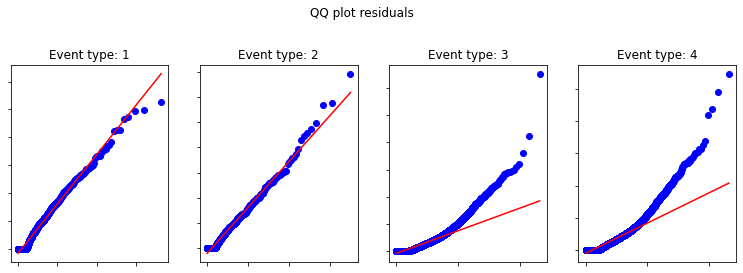

Anderson-Darling test to check distribution of residuals
Null hypothesis is "expon" 
Significance levels: [15.  10.   5.   2.5  1. ]
Critical values: [0.921 1.077 1.34  1.605 1.956]
event type=0, ad_stat: 607.8714328403396
event type=1, ad_stat: 361.3923740651651
event type=2, ad_stat: 109043.14310559261
event type=3, ad_stat: 96679.67637815818
None


In [13]:
model.goodness_of_fit.qq_plot_residuals(index_of_first_event_type=1,
                                        save_fig=False,)
print(model.goodness_of_fit.ad_test_on_residuals())

In [14]:
model.mle_estim.goodness_of_fit.qq_plot_residuals(index_of_first_event_type=1)
print(model.mle_estim.goodness_of_fit.ad_test_on_residuals())

AttributeError: 'EstimProcedure' object has no attribute 'goodness_of_fit'

In [ ]:
print(model.inflationary_pressure)
print(model.deflationary_pressure)
print(model.inflationary_pressure-model.deflationary_pressure)

In [ ]:
# model.set_transition_probabilities(model.transition_probabilities)

In [ ]:
# model.nonparam_estim.goodness_of_fit.qq_plot_residuals(index_of_first_event_type=1)
# print(model.nonparam_estim.goodness_of_fit.ad_test_on_residuals())

In [ ]:
# minim=model.mle_estim.results_of_estimation[3].get("MinimisationProcedure")
# minim.results

In [ ]:
print(model.base_rates)
print(model.mle_estim.base_rates)

In [ ]:
rho_max=0.0
for x in range(model.number_of_states):
    vals=(np.linalg.eigvals(model.impact_decay_ratios[:,x,:]))
    rho_max=max(rho_max,np.abs(np.amax(vals)))
#     print(model.impact_decay_ratios[:,x,:])
    print("x={}, max_L1norm={}, rho={}".format(x,np.amax(model.impact_decay_ratios[:,x,:]),np.amax(vals)))
print("rho_max={}".format(rho_max))    

In [ ]:
# model.mle_estim.dirichlet_param

In [ ]:
# model.impact_coefficients

In [ ]:
e1=1
e=0
model.decay_coefficients[e1,:,e]

In [ ]:
model.impact_decay_ratios[e1,:,e]

In [ ]:
np.amin(model.decay_coefficients)

In [ ]:
e=3
print(np.amax(model.impact_decay_ratios[:,:,e]))
print(np.amin(model.impact_decay_ratios[:,:,e]))
print(np.mean(model.impact_decay_ratios[:,:,e]))

In [ ]:
x=2
np.linalg.eigvals(model.impact_decay_ratios[:,x,:])

In [ ]:
model.inflationary_pressure

In [ ]:
model.deflationary_pressure

In [ ]:
model.impact_coefficients

In [ ]:
model.transition_probabilities

In [ ]:
model.calibration.mle_info